# NISQA MODEL PERFORMANCE ON TEST SET

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 300


                       stimuli  mos  mos_pred
0                      100.wav  1.0  3.511912
1                      102.wav  3.0  2.847826
2                      104.wav  5.0  2.226811
3                      105.wav  3.0  2.802018
4                      107.wav  2.0  3.975633
..                         ...  ...       ...
403  arm_09697_02055894109.wav  5.0  4.993323
404  arm_09697_02060725675.wav  5.0  5.007614
405  arm_09697_02082329754.wav  5.0  4.462036
406  arm_09697_02124352441.wav  5.0  4.661797
407  arm_09697_02134220061.wav  5.0  4.470185

[408 rows x 3 columns]
NISQA-TTS (v1.0) results:
Pearson correlation coefficient: 0.7018066241059673
Mean absolute error: 1.0025607499421811
Mean squared error: 1.454182764348301
Root mean squared error: 1.2058950055242377
R2 score: 0.37292351931861

NISQA (v2.0) results:
Pearson correlation coefficient: 0.5679128102306688
Mean absolute error: 1.4679318929419798
Mean squared error: 3.44608867233491
Root mean squared error: 1.8563643694961693
R

/home/aleph/tesis/.env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/aleph/tesis/.env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/aleph/tesis/.env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


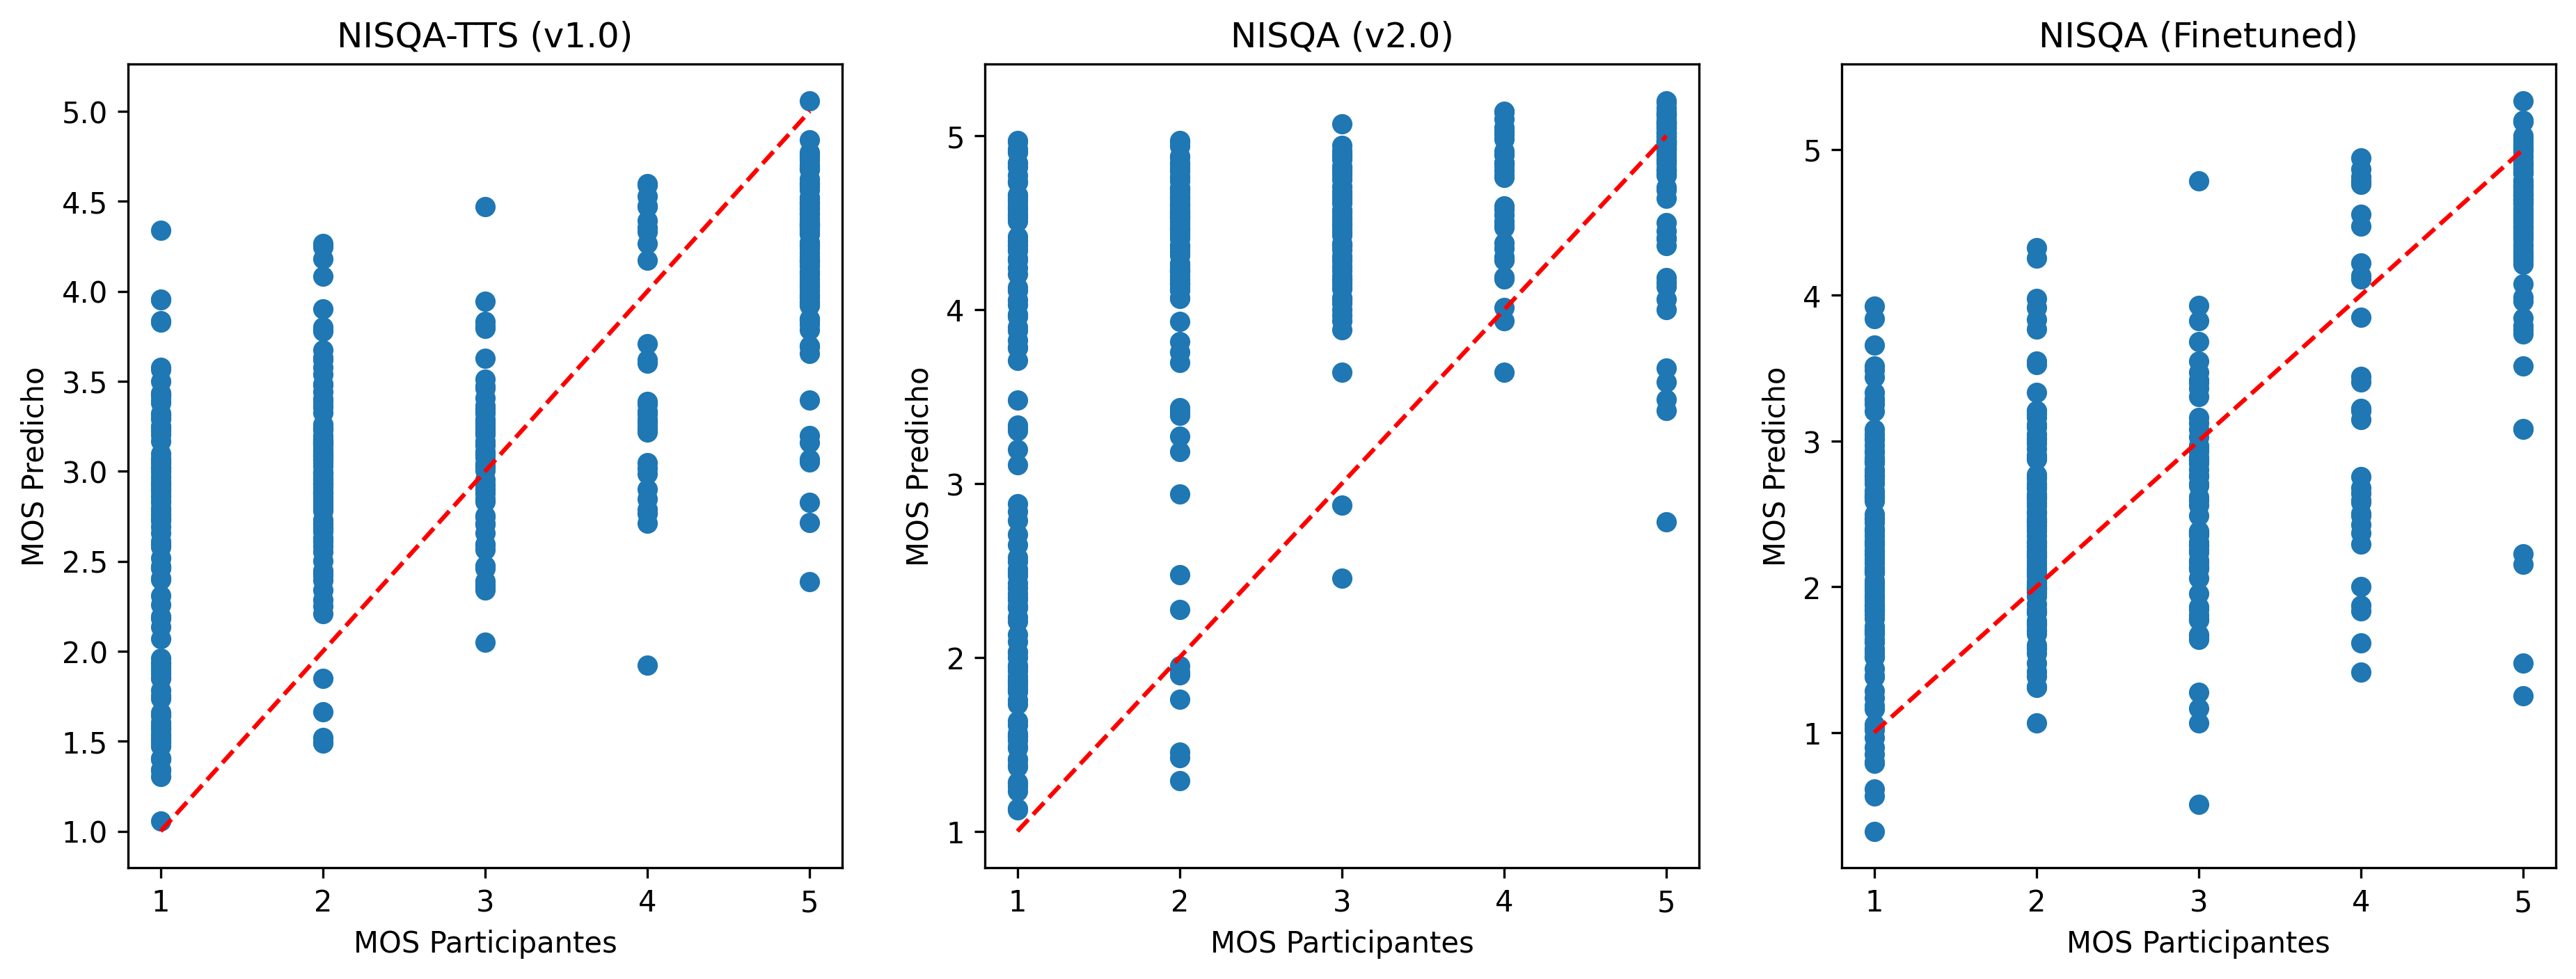

In [36]:
# read test set, NISQA-TTS (v1.0) results, and NISQA (v2.0) results
test = pd.read_csv('NISQA_results_no_finetuning/test_copy.csv')
test_for_finetuned_nisqa = pd.read_csv('finetuned_model/test_copy.csv')
NISQA_v1 = pd.read_csv('NISQA_results_no_finetuning/NISQA_v1_results.csv')
NISQA_v2 = pd.read_csv('NISQA_results_no_finetuning/NISQA_v2_results.csv')
NISQA_finetuned = pd.read_csv('finetuned_model/NISQA_custom_results.csv')

# discard every column except the 'stimuli' and 'mos_pred' columns
NISQA_v1 = NISQA_v1[['stimuli', 'mos_pred']]
NISQA_v2 = NISQA_v2[['stimuli', 'mos_pred']]
NISQA_finetuned = NISQA_finetuned[['stimuli', 'mos_pred']]

# pair the NISQA-TTS (v1.0) and NISQA (v2.0) results with the test set
NISQA_v1_paired = pd.merge(test, NISQA_v1, on='stimuli')
NISQA_v2_paired = pd.merge(test, NISQA_v2, on='stimuli')
NISQA_finetuned_paired = pd.merge(test_for_finetuned_nisqa, NISQA_finetuned, on='stimuli')
print(NISQA_finetuned_paired)
# calculate the Pearson correlation coefficient
NISQA_v1_corr = NISQA_v1_paired['mos_pred'].corr(NISQA_v1_paired['mos'])
NISQA_v2_corr = NISQA_v2_paired['mos_pred'].corr(NISQA_v2_paired['mos'])
NISQA_finetuned_corr = NISQA_finetuned_paired['mos_pred'].corr(NISQA_finetuned_paired['mos'])

# compute mae, mse, rmse and r2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_tts = mean_absolute_error(NISQA_v1_paired['mos'], NISQA_v1_paired['mos_pred'])
mae_2 = mean_absolute_error(NISQA_v2_paired['mos'], NISQA_v2_paired['mos_pred'])
mae_custom_1 = mean_absolute_error(NISQA_finetuned_paired['mos'], NISQA_finetuned_paired['mos_pred'])
mse_tts = mean_squared_error(NISQA_v1_paired['mos'], NISQA_v1_paired['mos_pred'])
mse_2 = mean_squared_error(NISQA_v2_paired['mos'], NISQA_v2_paired['mos_pred'])
mse_custom_1 = mean_squared_error(NISQA_finetuned_paired['mos'], NISQA_finetuned_paired['mos_pred'])
rmse_tts = mean_squared_error(NISQA_v1_paired['mos'], NISQA_v1_paired['mos_pred'], squared=False)
rmse_2 = mean_squared_error(NISQA_v2_paired['mos'], NISQA_v2_paired['mos_pred'], squared=False)
rmse_custom_1 = mean_squared_error(NISQA_finetuned_paired['mos'], NISQA_finetuned_paired['mos_pred'], squared=False)
r2_tts = r2_score(NISQA_v1_paired['mos'], NISQA_v1_paired['mos_pred'])
r2_2 = r2_score(NISQA_v2_paired['mos'], NISQA_v2_paired['mos_pred'])
r2_custom_1 = r2_score(NISQA_finetuned_paired['mos'], NISQA_finetuned_paired['mos_pred'])

# print the results
print('NISQA-TTS (v1.0) results:')
print('Pearson correlation coefficient:', NISQA_v1_corr)
print('Mean absolute error:', mae_tts)
print('Mean squared error:', mse_tts)
print('Root mean squared error:', rmse_tts)
print('R2 score:', r2_tts)
print()
print('NISQA (v2.0) results:')
print('Pearson correlation coefficient:', NISQA_v2_corr)
print('Mean absolute error:', mae_2)
print('Mean squared error:', mse_2)
print('Root mean squared error:', rmse_2)
print('R2 score:', r2_2)
print()
print('NISQA (Finetuned) results:')
print('Pearson correlation coefficient:', NISQA_finetuned_corr)
print('Mean absolute error:', mae_custom_1)
print('Mean squared error:', mse_custom_1)
print('Root mean squared error:', rmse_custom_1)
print('R2 score:', r2_custom_1)


# plot the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(NISQA_v1_paired['mos'], NISQA_v1_paired['mos_pred'])
ax[0].set_title('NISQA-TTS (v1.0)')
ax[0].set_xlabel('MOS Participantes')
ax[0].set_ylabel('MOS Predicho')
ax[0].plot([1, 5], [1, 5], 'r--')
ax[1].scatter(NISQA_v2_paired['mos'], NISQA_v2_paired['mos_pred'])
ax[1].set_title('NISQA (v2.0)')
ax[1].set_xlabel('MOS Participantes')
ax[1].set_ylabel('MOS Predicho')
ax[1].plot([1, 5], [1, 5], 'r--')
ax[2].scatter(NISQA_finetuned_paired['mos'], NISQA_finetuned_paired['mos_pred'])
ax[2].set_title('NISQA (Finetuned)')
ax[2].set_xlabel('MOS Participantes')
ax[2].set_ylabel('MOS Predicho')
ax[2].plot([1, 5], [1, 5], 'r--')
plt.show()


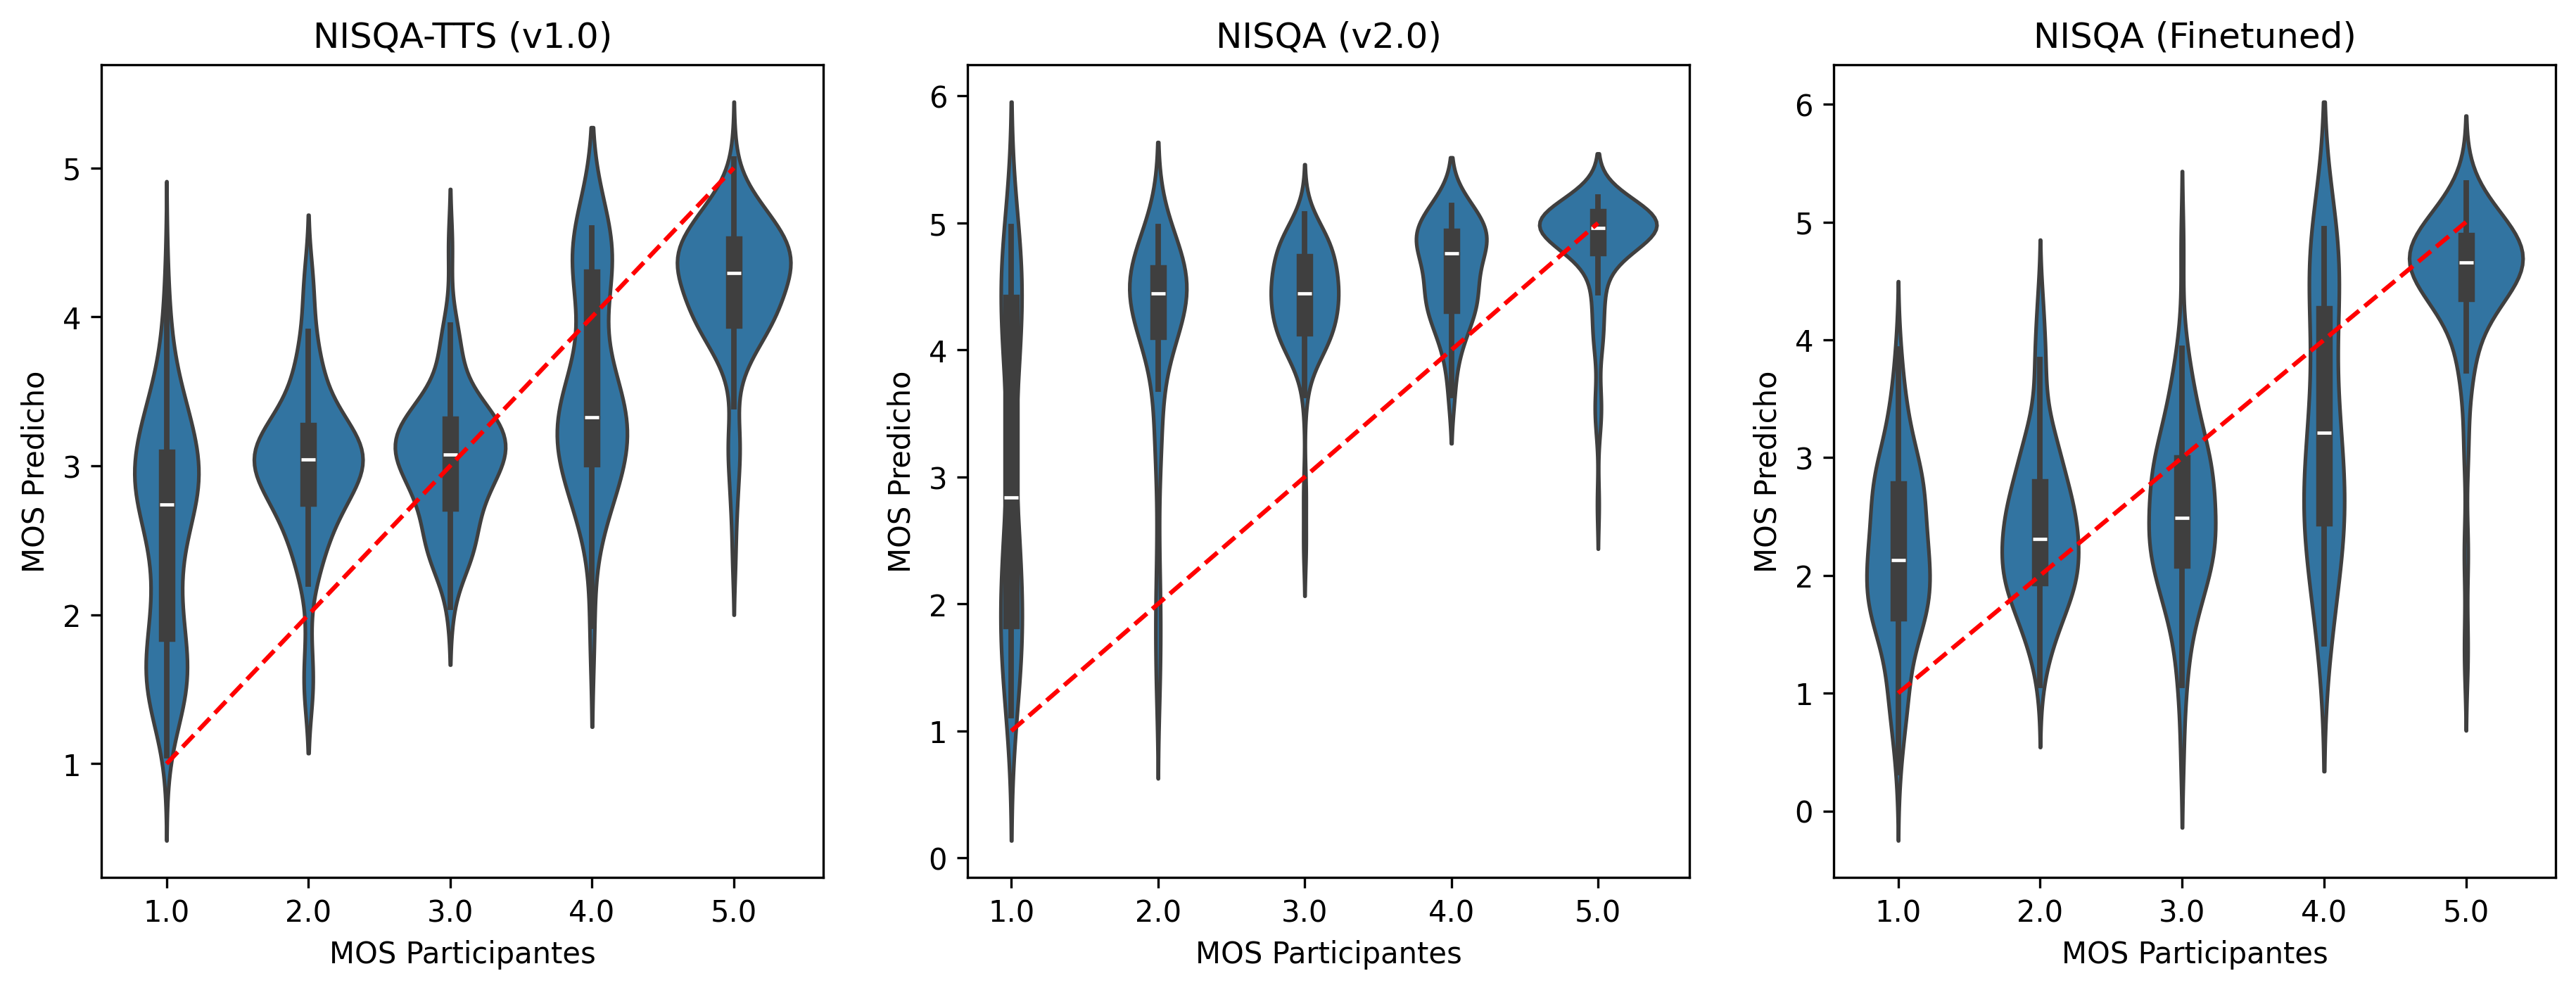

In [37]:
# now, lets plot the same data but with seaborn using a violin plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.violinplot(x='mos', y='mos_pred', data=NISQA_v1_paired, ax=ax[0])
ax[0].set_title('NISQA-TTS (v1.0)')
ax[0].set_xlabel('MOS Participantes')
ax[0].set_ylabel('MOS Predicho')
ax[0].plot([0, 4], [1, 5], 'r--')
sns.violinplot(x='mos', y='mos_pred', data=NISQA_v2_paired, ax=ax[1])
ax[1].set_title('NISQA (v2.0)')
ax[1].set_xlabel('MOS Participantes')
ax[1].set_ylabel('MOS Predicho')
ax[1].plot([0, 4], [1, 5], 'r--')
sns.violinplot(x='mos', y='mos_pred', data=NISQA_finetuned_paired, ax=ax[2])
ax[2].set_title('NISQA (Finetuned)')
ax[2].set_xlabel('MOS Participantes')
ax[2].set_ylabel('MOS Predicho')
ax[2].plot([0, 4], [1, 5], 'r--')
plt.show()


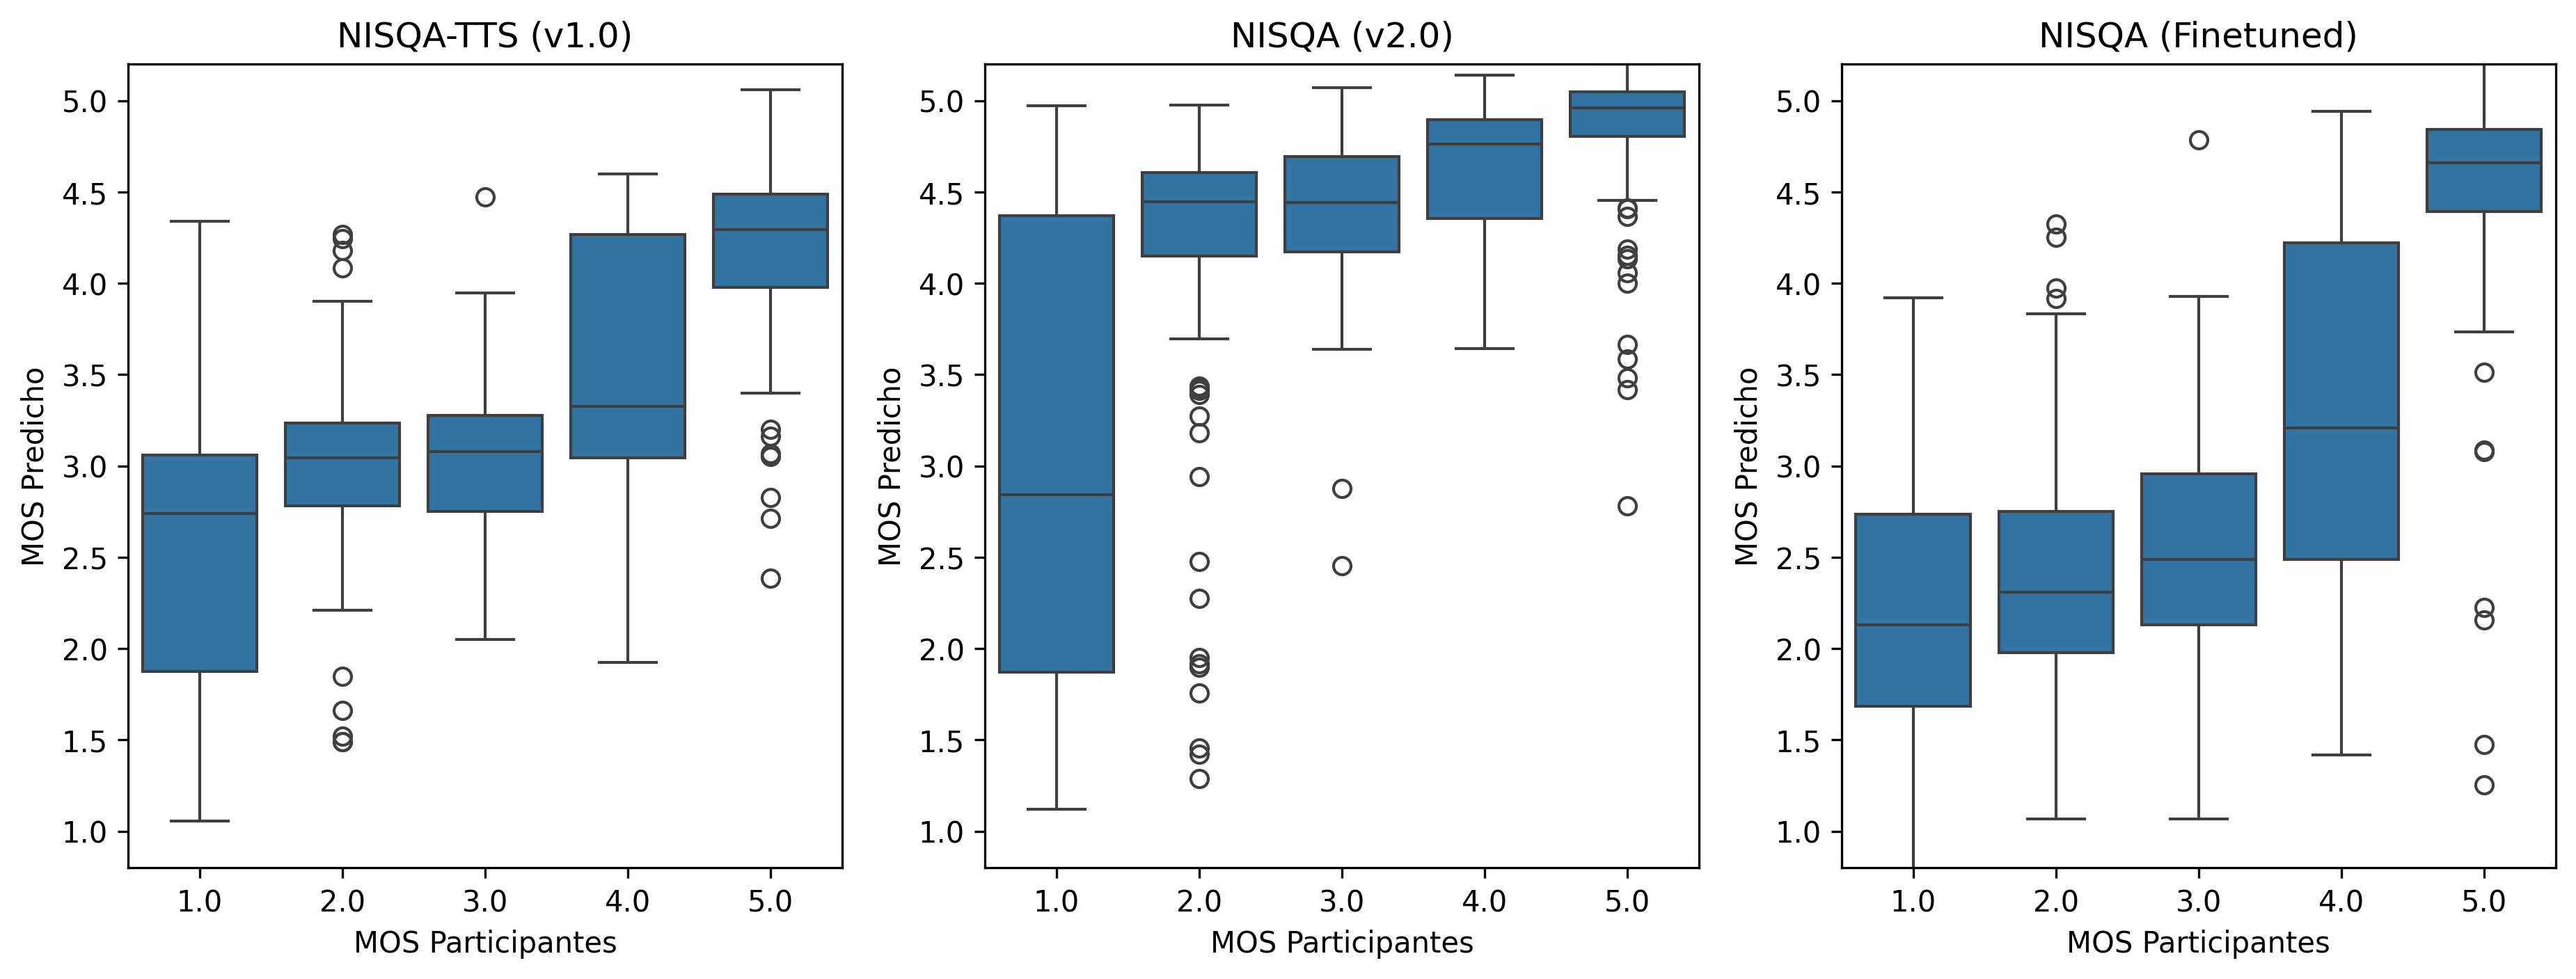

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='mos', y='mos_pred', data=NISQA_v1_paired, ax=ax[0])
ax[0].set_title('NISQA-TTS (v1.0)')
ax[0].set_xlabel('MOS Participantes')
ax[0].set_ylabel('MOS Predicho')
ax[0].set_ylim(0.8, 5.2)
sns.boxplot(x='mos', y='mos_pred', data=NISQA_v2_paired, ax=ax[1])
ax[1].set_title('NISQA (v2.0)')
ax[1].set_xlabel('MOS Participantes')
ax[1].set_ylabel('MOS Predicho')
ax[1].set_ylim(0.8, 5.2)
sns.boxplot(x='mos', y='mos_pred', data=NISQA_finetuned_paired, ax=ax[2])
ax[2].set_title('NISQA (Finetuned)')
ax[2].set_xlabel('MOS Participantes')
ax[2].set_ylabel('MOS Predicho')
ax[2].set_ylim(0.8, 5.2)
plt.show()
